<a href="https://colab.research.google.com/github/mohdfaaiz1307/PRODIGY_ML_TASKS/blob/main/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir-p ~/ .kaggle
!cp kaggle.json ~/.kaggle/

/bin/bash: line 1: mkdir-p: command not found
cp: cannot create regular file '/root/.kaggle/': Not a directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout
from tensorflow.keras import regularizers

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory
# generators
train_ds=image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image, label):
    image= tf.cast(image/255., tf.float32)
    return image, label

train_ds= train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Create CNN Model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(10, 10), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(20, 20), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(10, 10), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Fourth convolutional layer
model.add(Conv2D(256, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flattening the input for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 247, 247, 32)        │           9,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 247, 247, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 123, 123, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 104, 104, 64)        │         819,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 104, 104, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 52, 52, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 43, 43, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 43, 43, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 17, 17, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 17, 17, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 80)                  │       1,310,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,784,681 (14.44 MB)

 Trainable params: 3,783,721 (14.43 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 217s 281ms/step - accuracy: 0.5146 - loss: 0.7506 - val_accuracy: 0.5496 - val_loss: 0.6837
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 216s 266ms/step - accuracy: 0.5317 - loss: 0.6909 - val_accuracy: 0.6054 - val_loss: 0.6710
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.5814 - loss: 0.6735 - val_accuracy: 0.6054 - val_loss: 0.6490
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.6448 - loss: 0.6220 - val_accuracy: 0.6582 - val_loss: 0.6116
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.6864 - loss: 0.5798 - val_accuracy: 0.7152 - val_loss: 0.5512
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 268ms/step - accuracy: 0.7200 - loss: 0.5390 - val_accuracy: 0.7482 - val_loss: 0.5088
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.7534 - loss: 0.4863 - val_accuracy: 0.7734 - val_loss: 0.4796
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 264ms/step - accuracy: 0.7771 -

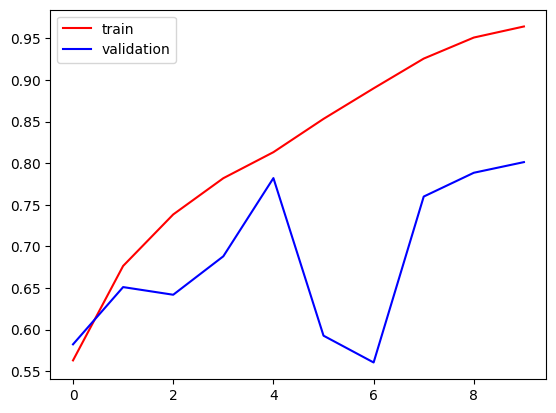

In [ ]:
#before
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

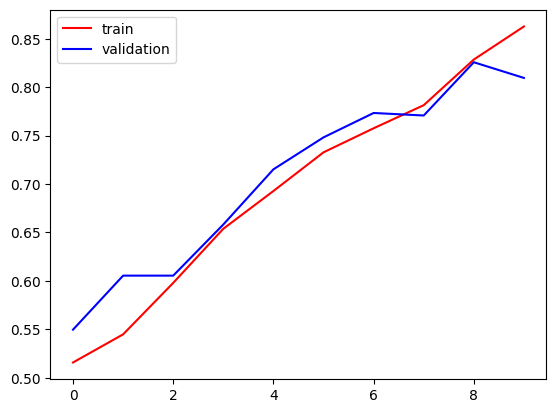

In [11]:
#After
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

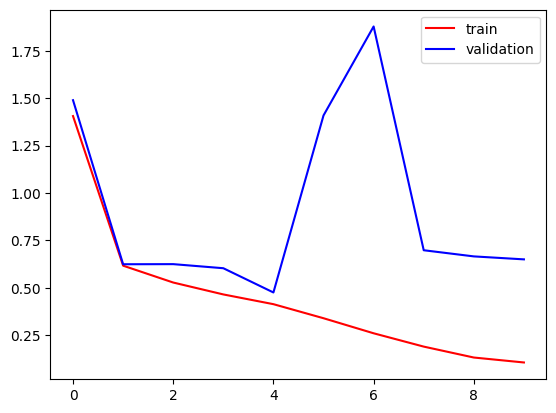

In [ ]:
#before
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

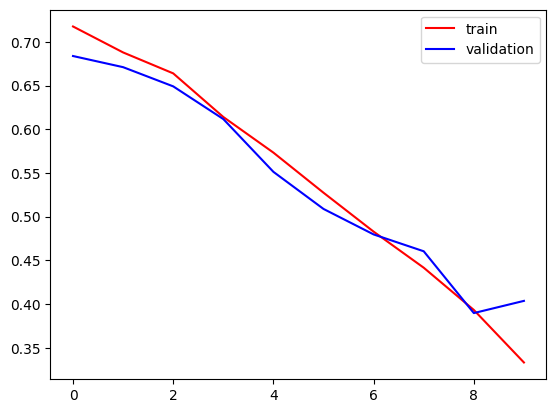

In [12]:
#After
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Ways to reduce Overfitting
# Add More Data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity

In [13]:
import cv2

In [14]:
test_img=cv2.imread("/content/cat.1724.jpg")

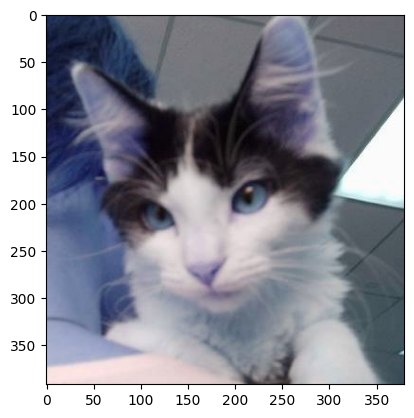

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(392, 380, 3)

In [17]:
test_img=cv2.resize(test_img,(256,256))

In [18]:
test_input=test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)